In [105]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
file = ('AAPL, 1D 01012007-12072023.csv')
apple_df = pd.read_csv(file)
apple_df.head(5)

volume    vwap    open   close    high     low        time  \
0  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250  1167800400   
1  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936  1167886800   
2  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143  1167973200   
3  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457  1168232400   
4  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411  1168318800   

   transactions  
0        189737  
1        136333  
2        141050  
3        130547  
4        569578

In [48]:
apple_df['time'] = pd.to_datetime(apple_df['time'], unit='s')
apple_df.head(5)

volume    vwap    open   close    high     low                time  \
0  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250 2007-01-03 05:00:00   
1  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936 2007-01-04 05:00:00   
2  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143 2007-01-05 05:00:00   
3  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457 2007-01-08 05:00:00   
4  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411 2007-01-09 05:00:00   

   transactions  
0        189737  
1        136333  
2        141050  
3        130547  
4        569578

In [49]:
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4159 entries, 0 to 4158
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   volume        4159 non-null   float64       
 1   vwap          4159 non-null   float64       
 2   open          4159 non-null   float64       
 3   close         4159 non-null   float64       
 4   high          4159 non-null   float64       
 5   low           4159 non-null   float64       
 6   time          4159 non-null   datetime64[ns]
 7   transactions  4159 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 260.1 KB


In [50]:
apple_df.describe()

volume         vwap         open        close         high  \
count  4.159000e+03  4159.000000  4159.000000  4159.000000  4159.000000   
mean   3.662925e+08    46.391382    46.362788    46.396058    46.881127   
min    2.422234e+07     2.841000     2.835400     2.792900     2.928600   
25%    1.067497e+08    11.936200    11.955700    11.947150    12.028400   
50%    2.136463e+08    25.885200    25.775000    25.825000    26.262800   
75%    4.965321e+08    52.154150    52.263750    52.231250    52.626250   
max    3.373042e+09   193.102000   193.780000   193.970000   194.480000   
std    3.724793e+08    50.277557    50.235593    50.293482    50.843874   

               low                           time  transactions  
count  4159.000000                           4159  4.159000e+03  
mean     45.865790  2015-04-06 10:13:19.807646208  2.709318e+05  
min       2.792900            2007-01-03 05:00:00  3.048700e+04  
25%      11.853600            2011-02-16 17:00:00  1.128150e+05  
50%      25.680000            2015-04-08 04:00:00  1.782460e+05  
75%      51.796250            2019-05-23 16:00:00  3.259555e+05  
max     191.760000            2023-07-12 04:00:00  2.966979e+06  
std      49.680104                            NaN  2.510859e+05

In the below I am changing the time column from epoch to datetime

In [51]:
apple_df['time'] = pd.to_datetime(apple_df['time'])
print(apple_df.dtypes)

volume                 float64
vwap                   float64
open                   float64
close                  float64
high                   float64
low                    float64
time            datetime64[ns]
transactions             int64
dtype: object


In the below I have created another column of the years of the time column and created bins of the years 

In [52]:
apple_df['year'] = apple_df['time'].dt.year

bins = [1999, 2009, 2019, 2029]
labels = [2000, 2010, 2020]

apple_df['time_bins'] = pd.cut(apple_df['year'], bins=bins, labels=labels, right=False)

Below I created quarters from the time as a string

In [54]:
apple_df['quarter'] = pd.PeriodIndex(apple_df['time'], freq='Q').astype(str)

In [55]:
apple_df.head()

volume    vwap    open   close    high     low                time  \
0  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250 2007-01-03 05:00:00   
1  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936 2007-01-04 05:00:00   
2  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143 2007-01-05 05:00:00   
3  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457 2007-01-08 05:00:00   
4  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411 2007-01-09 05:00:00   

   transactions  year time_bins quarter  
0        189737  2007      2000  2007Q1  
1        136333  2007      2000  2007Q1  
2        141050  2007      2000  2007Q1  
3        130547  2007      2000  2007Q1  
4        569578  2007      2000  2007Q1

Below I have created two line plots using matplotlibs to show the closing prices per bin year and volumn per bin year

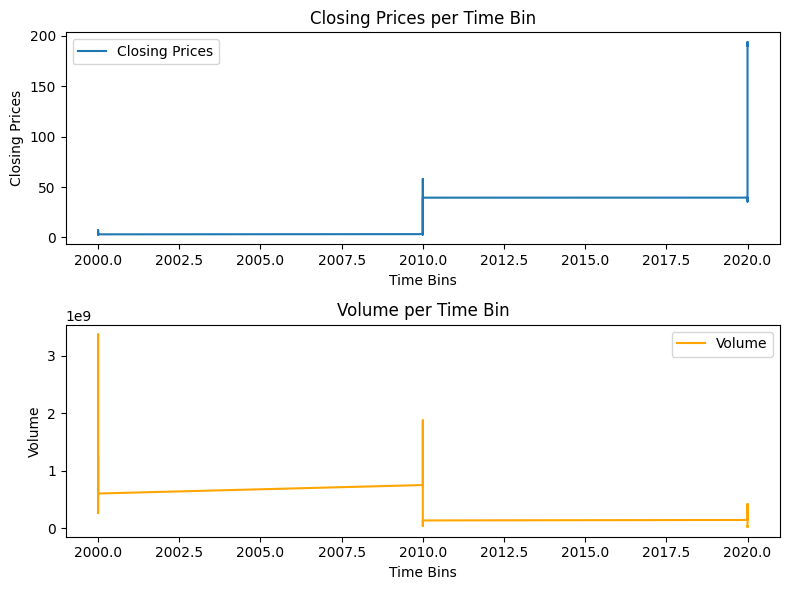

In [63]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].plot(apple_df['time_bins'], apple_df['close'], label='Closing Prices')
axes[0].set_title('Closing Prices per Time Bin')
axes[0].set_xlabel('Time Bins')
axes[0].set_ylabel('Closing Prices')
axes[0].legend()

axes[1].plot(apple_df['time_bins'], apple_df['volume'], label='Volume', color='orange')
axes[1].set_title('Volume per Time Bin')
axes[1].set_xlabel('Time Bins')
axes[1].set_ylabel('Volume')
axes[1].legend()

plt.tight_layout()
plt.show()

I created two lineplots for Closing Times and Volume by Quarter

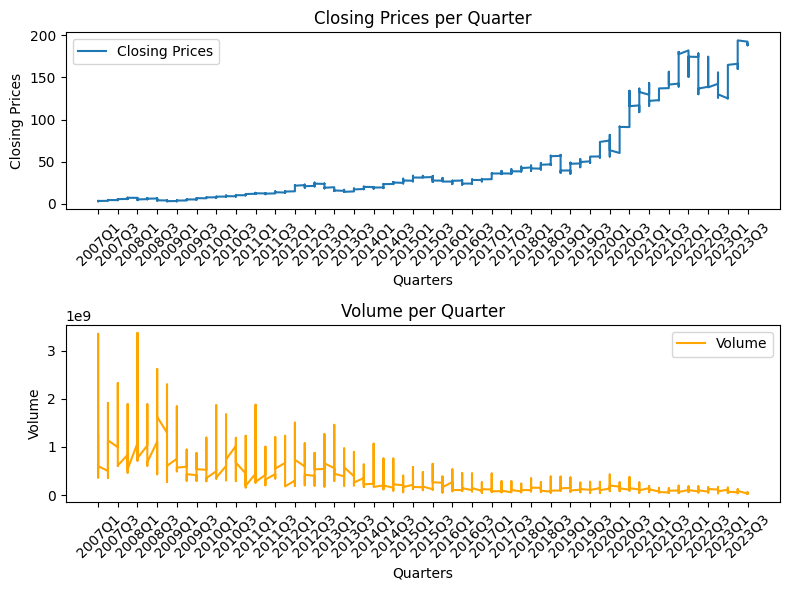

In [60]:
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

axes[0].plot(apple_df['quarter'], apple_df['close'], label='Closing Prices')
axes[0].set_title('Closing Prices per Quarter')
axes[0].set_xlabel('Quarters')
axes[0].set_ylabel('Closing Prices')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_xticks(axes[0].get_xticks()[::2])

axes[1].plot(apple_df['quarter'], apple_df['volume'], label='Volume', color='orange')
axes[1].set_title('Volume per Quarter')
axes[1].set_xlabel('Quarters')
axes[1].set_ylabel('Volume')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_xticks(axes[1].get_xticks()[::2])

plt.tight_layout()
plt.show()

Candlestick chart depicting high and low prices

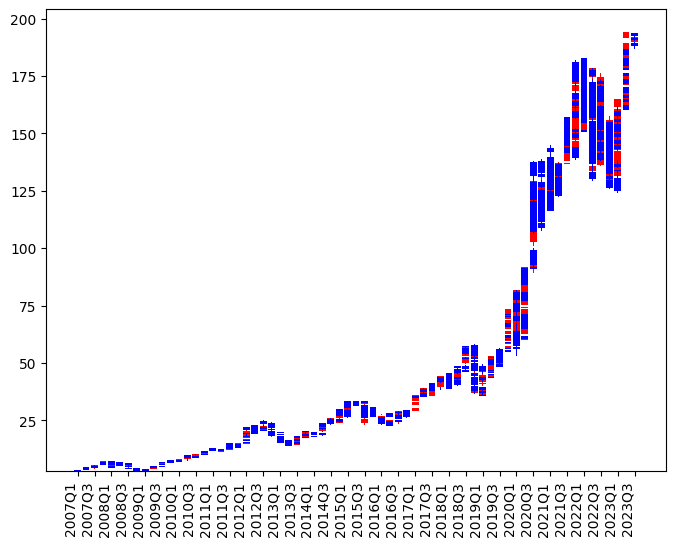

In [77]:
fig, ax = plt.subplots(figsize=(8, 6))

# "up" dataframe will store the stock_prices  
# when the closing stock price is greater 
# than or equal to the opening stock prices 
up = apple_df[apple_df.close >= apple_df.open] 

# "down" dataframe will store the stock_prices 
# when the closing stock price is 
# lesser than the opening stock prices 
down = apple_df[apple_df.close < apple_df.open] 

# When the stock prices have decreased, then it 
# will be represented by blue color candlestick 
col1 = 'red'

# When the stock prices have increased, then it  
# will be represented by green color candlestick 
col2 = 'blue'

# Setting width of candlestick elements 
width = .8
width2 = .08

# Plotting up prices of the stock 
ax.bar(up.quarter, up.close-up.open, width, bottom=up.open, color=col1) 
ax.bar(up.quarter, up.high-up.close, width2, bottom=up.close, color=col1) 
ax.bar(up.quarter, up.low-up.open, width2, bottom=up.open, color=col1) 

# Plotting down prices of the stock 
ax.bar(down.quarter, down.close-down.open, width, bottom=down.open, color=col2) 
ax.bar(down.quarter, down.high-down.open, width2, bottom=down.open, color=col2) 
ax.bar(down.quarter, down.low-down.close, width2, bottom=down.close, color=col2) 

# rotating the x-axis tick labels at 90degree  
# towards right 
plt.xticks(rotation=90, ha='right')
ax.set_xticks(ax.get_xticks()[::2])

plt.show()

Statistical Analysis

Compute summary statistics (mean, median, standard deviation) for key column e.

In [82]:
mean_open = np.mean(apple_df['open'])
mean_close = np.mean(apple_df['close'])
mean_volume = np.mean(apple_df['volume'])
mean_transactions = np.mean(apple_df['transactions'])
mean_high = np.mean(apple_df['high'])
mean_low = np.mean(apple_df['low'])

print("MEAN")
print("Mean Open:", mean_open)
print("Mean Close:", mean_close)
print("Mean Volume:", mean_volume)
print("Mean Transactions:", mean_transactions)                         
print("Mean High:", mean_high)
print("Mean Low:", mean_low)

median_open = np.median(apple_df['open'])
median_close = np.median(apple_df['close'])
median_volume = np.median(apple_df['volume'])
median_transactions = np.median(apple_df['transactions'])
median_high = np.median(apple_df['high'])
median_low = np.median(apple_df['low'])

print()
print("MEDIAN")
print("Median Open:", median_open)
print("Median Close:", median_close)
print("Median Volume:", median_volume)
print("Median Transactions:", median_transactions)  
print("Median High:", median_high)
print("Median Low:", median_low)

std_open = np.std(apple_df['open'])
std_close = np.std(apple_df['close'])
std_volume = np.std(apple_df['volume'])
std_transactions = np.std(apple_df['transactions'])
std_high = np.std(apple_df['high'])
std_low = np.std(apple_df['low'])

print()
print("STANDARD DEVIATION")
print("Standard Deviation Open:", std_open)
print("Standard Deviation Close:", std_close)
print("Standard Deviation Volume:", std_volume)
print("Standard Deviation Transactions:", std_transactions) 
print("Standard Deviation High:", std_high)
print("Standard Deviation Low:", std_low)

MEAN
Mean Open: 46.362787713392635
Mean Close: 46.39605770617938
Mean Volume: 366292450.04688627
Mean Transactions: 270931.7744650156
Mean High: 46.88112704977158
Mean Low: 45.865790310170716

MEDIAN
Median Open: 25.775
Median Close: 25.825
Median Volume: 213646276.0
Median Transactions: 178246.0
Median High: 26.2628
Median Low: 25.68

STANDARD DEVIATION
Standard Deviation Open: 50.22955297799769
Standard Deviation Close: 50.287435678189986
Standard Deviation Volume: 372434498.45125306
Standard Deviation Transactions: 251055.66708473352
Standard Deviation High: 50.83776107935955
Standard Deviation Low: 49.674130798443436


**Analyze closing prices with a moving average**

In [87]:
close_prices = apple_df['close'].to_frame()
 
# Calculate 30-day Moving Average (MA)
close_prices['MA30'] = close_prices['close'].rolling(30).mean()
 
close_prices.dropna(inplace=True)
 
print(close_prices)

         close        MA30
29      3.0464    3.125747
30      3.0432    3.127423
31      3.0296    3.126433
32      3.0679    3.127447
33      3.1857    3.131887
...        ...         ...
4154  191.8100  183.049333
4155  190.6800  183.686667
4156  188.6100  184.245667
4157  188.0800  184.748667
4158  190.0099  185.234663

[4130 rows x 2 columns]


<Axes: title={'center': 'Closing Prices v 30 Day Moving Average'}>

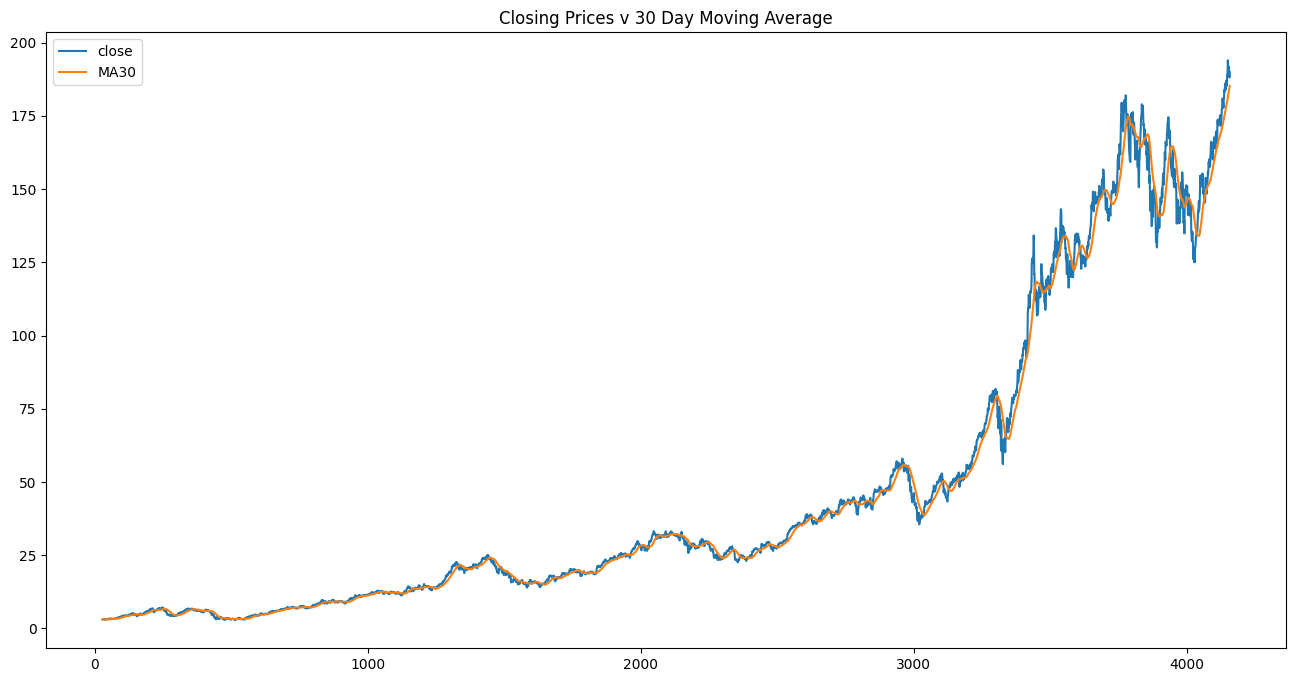

In [91]:
close_prices[['close', 'MA30']].plot(label='Close Prices', figsize=(16, 8), title='Closing Prices v 30 Day Moving Average')

**Hypothesis Testing**
Execute a t-test to compare average closing prices across different years.

In [101]:
year1 = 2020
year2 = 2023

group1 = apple_df[apple_df['year'] == year1]['close']
group2 = apple_df[apple_df['year'] == year2]['close']

t_statistic, p_value = stats.ttest_ind(group1, group2, equal_var=False)
print("Two-Sample t-test - t-statistic:", t_statistic)
print("Two Sample t-test - p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis, there is a significant difference between the mean close data and the sample years.")
else:
    print("Fail to reject the null hypothesis, there is no significant differencebetween the mean close data and the sample years.")


Two-Sample t-test - t-statistic: -33.08854679237306
Two Sample t-test - p-value: 9.540466013777481e-106
Reject the null hypothesis, there is a significant difference between the mean close data and the sample years.


**Hypothesis Testing**
Examine daily returnsâ€™ distribution and test for normality using SciPy

In [103]:
apple_df['days'] = apple_df['time'].dt.day

volume    vwap    open   close    high     low                time  \
0  1.245445e+09  3.0302  3.0821  2.9929  3.0921  2.9250 2007-01-03 05:00:00   
1  8.554834e+08  3.0403  3.0018  3.0593  3.0696  2.9936 2007-01-04 05:00:00   
2  8.352580e+08  3.0426  3.0632  3.0375  3.0786  3.0143 2007-01-05 05:00:00   
3  7.974138e+08  3.0683  3.0700  3.0525  3.0904  3.0457 2007-01-08 05:00:00   
4  3.352007e+09  3.1946  3.0875  3.3061  3.3207  3.0411 2007-01-09 05:00:00   

   transactions  year time_bins quarter  days  
0        189737  2007      2000  2007Q1     3  
1        136333  2007      2000  2007Q1     4  
2        141050  2007      2000  2007Q1     5  
3        130547  2007      2000  2007Q1     8  
4        569578  2007      2000  2007Q1     9

In [104]:
year = 2023

closing_prices = apple_df[apple_df['year'] == year]['close']

k2, p_value = stats.normaltest(closing_prices)
print("Normality test - k2 statistic:", k2)
print("Normality test - p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The data is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The data is normally distributed.")

Normality test - k2 statistic: 6.621233870875876
Normality test - p-value: 0.03649365257986328
Reject the null hypothesis: The data is not normally distributed.


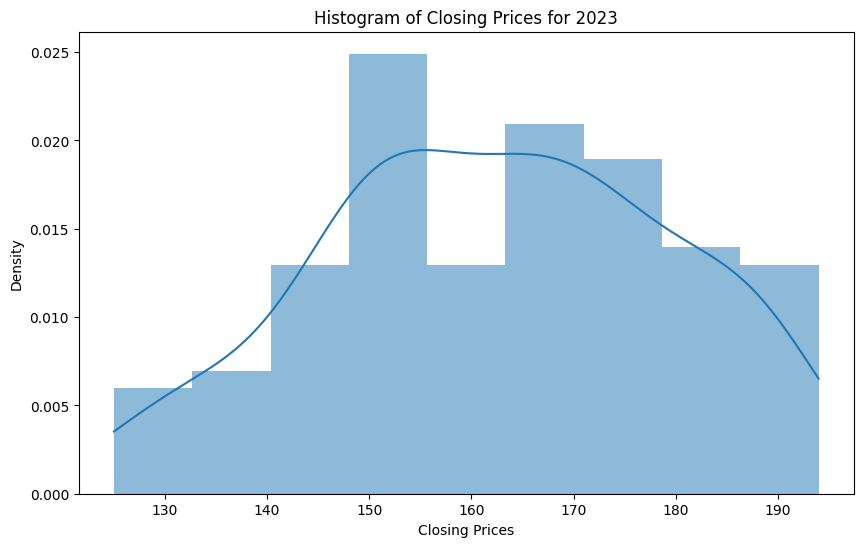

In [108]:
plt.figure(figsize=(10, 6))
sns.histplot(closing_prices, kde=True, stat="density", linewidth=0)
plt.title(f'Histogram of Closing Prices for {year}')
plt.xlabel('Closing Prices')
plt.ylabel('Density')
plt.show()